In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [36]:
data = pd.read_csv('Datasets/weatherAUS.csv')
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

### Pairplot before removing outliers

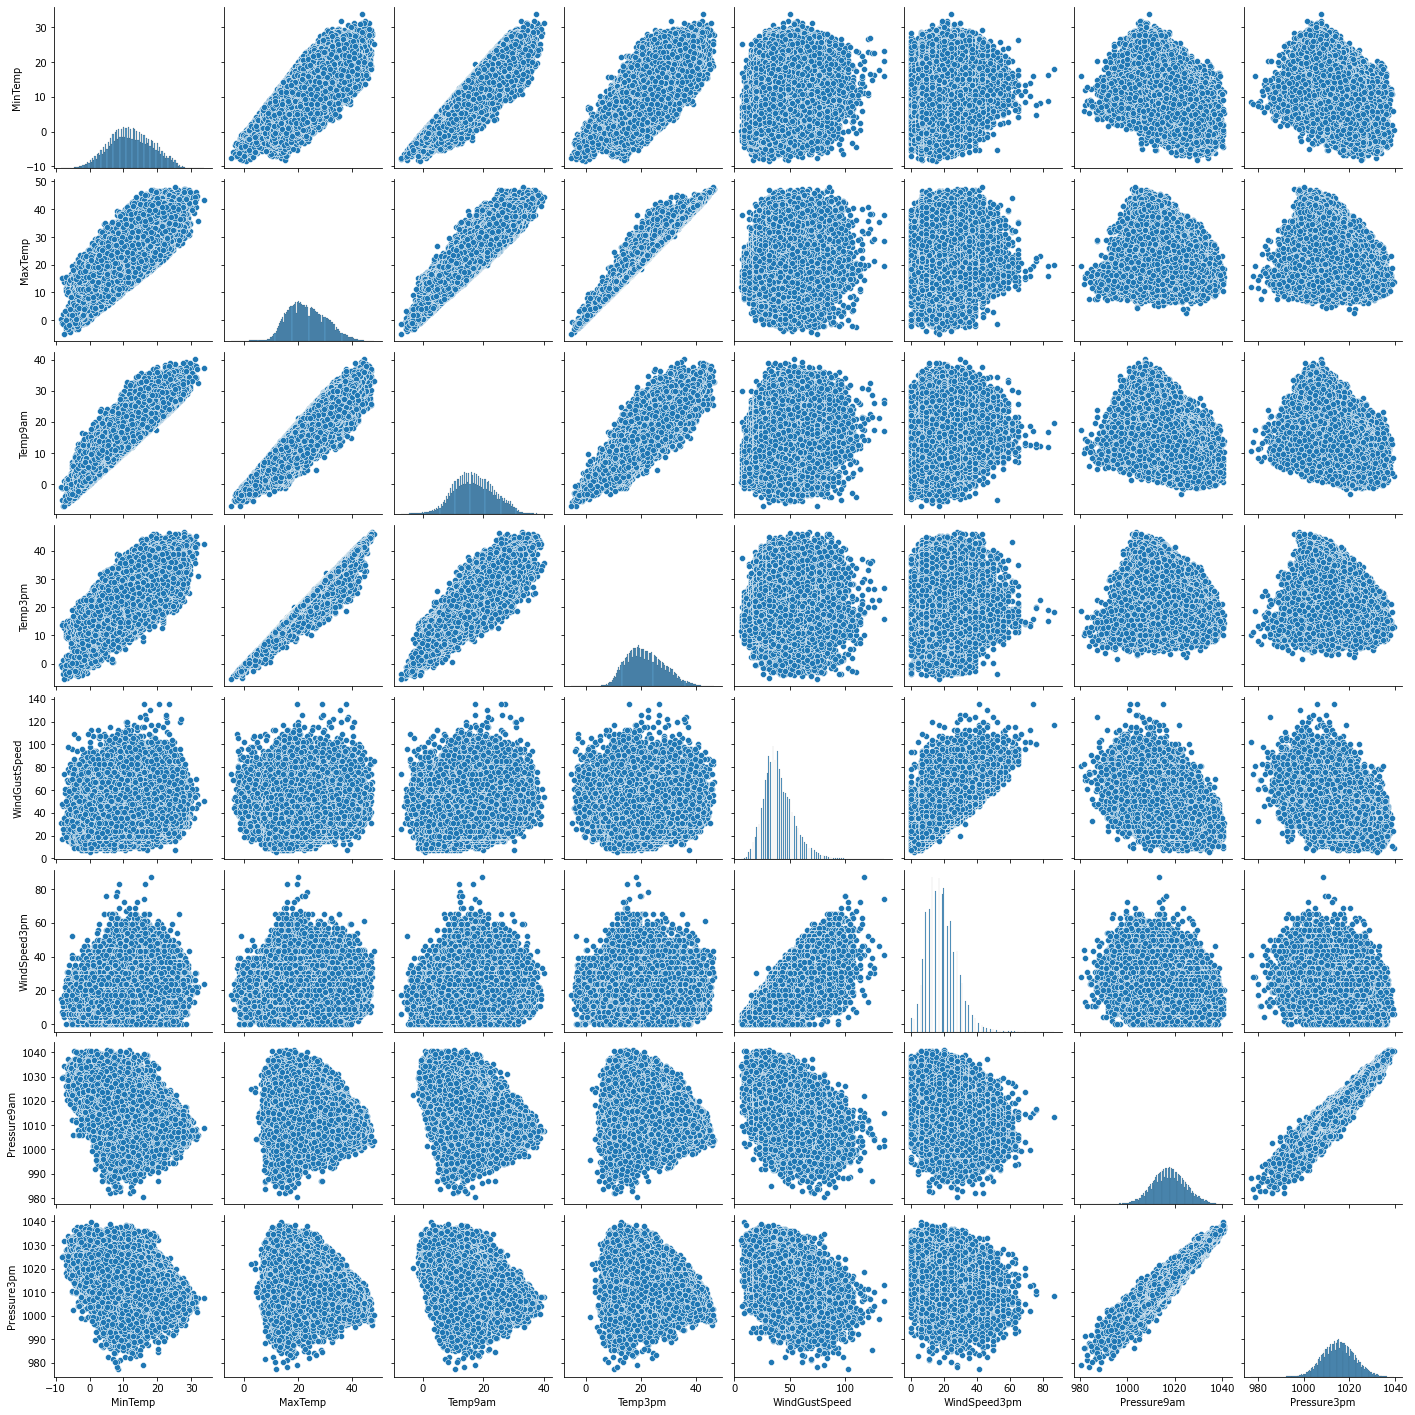

In [3]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
sns.pairplot(data[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [4]:
data.keys()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Analysis of Null Values

In [37]:
for col in data.columns:
    print(col + ' : ' + str(round((data[col].isnull().sum() / data.shape[0]) * 100, 2)) + '% missing values')

Date : 0.0% missing values
Location : 0.0% missing values
MinTemp : 1.02% missing values
MaxTemp : 0.87% missing values
Rainfall : 2.24% missing values
Evaporation : 43.17% missing values
Sunshine : 48.01% missing values
WindGustDir : 7.1% missing values
WindGustSpeed : 7.06% missing values
WindDir9am : 7.26% missing values
WindDir3pm : 2.91% missing values
WindSpeed9am : 1.21% missing values
WindSpeed3pm : 2.11% missing values
Humidity9am : 1.82% missing values
Humidity3pm : 3.1% missing values
Pressure9am : 10.36% missing values
Pressure3pm : 10.33% missing values
Cloud9am : 38.42% missing values
Cloud3pm : 40.81% missing values
Temp9am : 1.21% missing values
Temp3pm : 2.48% missing values
RainToday : 2.24% missing values
RainTomorrow : 2.25% missing values


#### Dropping Sunshine and Evaporation as it contains more than 40% of null values

In [38]:
data.drop(['Evaporation', 'Sunshine','Cloud9am','Cloud3pm'], axis=1, inplace=True)

In [39]:
data

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0       2008-12-01   Albury     13.4     22.9       0.6           W   
1       2008-12-02   Albury      7.4     25.1       0.0         WNW   
2       2008-12-03   Albury     12.9     25.7       0.0         WSW   
3       2008-12-04   Albury      9.2     28.0       0.0          NE   
4       2008-12-05   Albury     17.5     32.3       1.0           W   
...            ...      ...      ...      ...       ...         ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0           E   
145456  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
145457  2017-06-23    Uluru      5.4     26.9       0.0           N   
145458  2017-06-24    Uluru      7.8     27.0       0.0          SE   
145459  2017-06-25    Uluru     14.9      NaN       0.0         NaN   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0                44.0          W        WNW          20.0          24.0   
1                44.0        NNW        WSW           4.0          22.0   
2                46.0          W        WSW          19.0          26.0   
3                24.0         SE          E          11.0           9.0   
4                41.0        ENE         NW           7.0          20.0   
...               ...        ...        ...           ...           ...   
145455           31.0         SE        ENE          13.0          11.0   
145456           22.0         SE          N          13.0           9.0   
145457           37.0         SE        WNW           9.0           9.0   
145458           28.0        SSE          N          13.0           7.0   
145459            NaN        ESE        ESE          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0              71.0         22.0       1007.7       1007.1     16.9     21.8   
1              44.0         25.0       1010.6       1007.8     17.2     24.3   
2              38.0         30.0       1007.6       1008.7     21.0     23.2   
3              45.0         16.0       1017.6       1012.8     18.1     26.5   
4              82.0         33.0       1010.8       1006.0     17.8     29.7   
...             ...          ...          ...          ...      ...      ...   
145455         51.0         24.0       1024.6       1020.3     10.1     22.4   
145456         56.0         21.0       1023.5       1019.1     10.9     24.5   
145457         53.0         24.0       1021.0       1016.8     12.5     26.1   
145458         51.0         24.0       1019.4       1016.5     15.1     26.0   
145459         62.0         36.0       1020.2       1017.9     15.0     20.9   

       RainToday RainTomorrow  
0             No           No  
1             No           No  
2             No           No  
3             No           No  
4             No           No  
...          ...          ...  
145455        No           No  
145456        No           No  
145457        No           No  
145458        No           No  
145459        No          NaN  

[145460 rows x 19 columns]

### Analysing boxplot before removing outliers

Text(0, 0.5, 'Temp3pm')

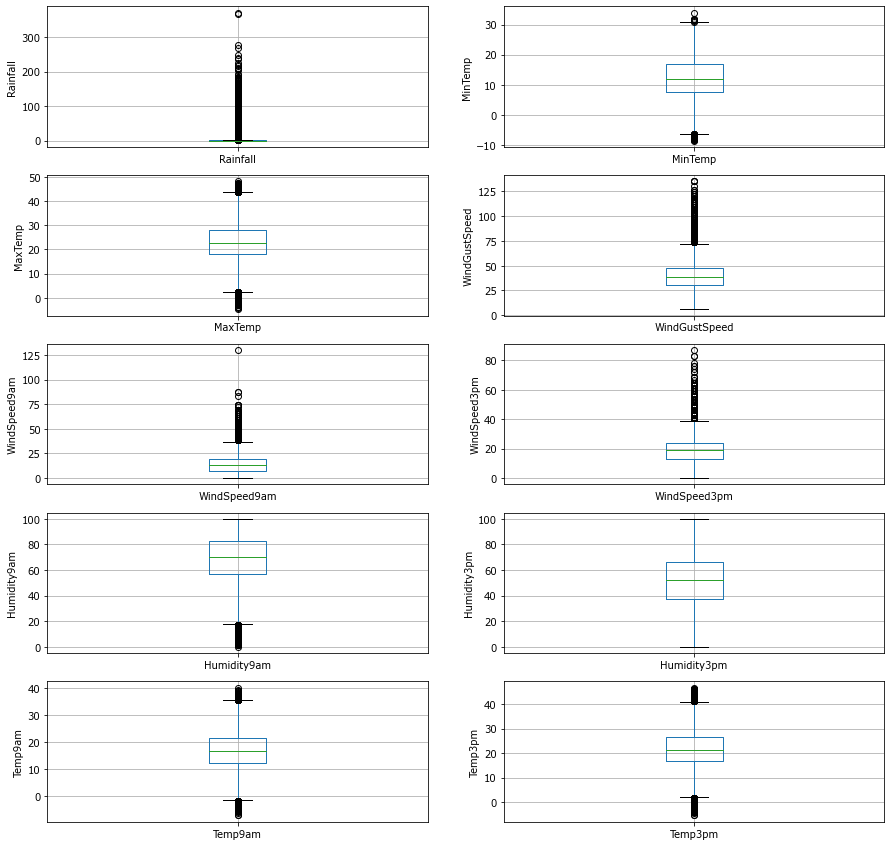

In [6]:
plt.figure(figsize=(15,15))

plt.subplot(5, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(5, 2, 2)
fig = data.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')

plt.subplot(5, 2, 3)
fig = data.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

plt.subplot(5, 2, 4)
fig = data.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(5, 2, 5)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(5, 2, 6)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(5, 2, 7)
fig = data.boxplot(column='Humidity9am')
fig.set_title('')
fig.set_ylabel('Humidity9am')

plt.subplot(5, 2, 8)
fig = data.boxplot(column='Humidity3pm')
fig.set_title('')
fig.set_ylabel('Humidity3pm')

plt.subplot(5, 2, 9)
fig = data.boxplot(column='Temp9am')
fig.set_title('')
fig.set_ylabel('Temp9am')

plt.subplot(5, 2, 10)
fig = data.boxplot(column='Temp3pm')
fig.set_title('')
fig.set_ylabel('Temp3pm')


## Converting date to DateTime objects for further seasonal analysis

In [40]:
#set date to datetime object
data['Date'] = pd.to_datetime(data['Date'])
data.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

## Storing Location in separate variable for location-seasonal analysis

In [41]:
#get unique locations
locations = data['Location'].unique()
locations

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

## Creating separate column seasonal wise i.e month column

According to Australian Seasonal Weather, the months grouped according to seasonal data are : 
<div>
    <ul>
        <li> Summer => 1-3
        <li> Fall => 3-6
        <li> Winter => 6-9
        <li> Spring => 9-12
    </ul>
</div>    

In [42]:
month = [d.month for d in data['Date']]
data['Month'] = month

In [12]:
Direction = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
Degree = []

x = 0
for i in range(0,337,22):
    Degree.append(i+x)
    x = x + 0.5
    
Direction_Degree = dict(zip(Direction,Degree))
print(Direction_Degree)

#Converting WindGustDir, WindDir9am, WindDir3pm to degree format

data = data.replace({"WindGustDir": Direction_Degree})
data = data.replace({"WindDir9am": Direction_Degree})
data = data.replace({"WindDir3pm": Direction_Degree})

{'N': 0, 'NNE': 22.5, 'NE': 45.0, 'ENE': 67.5, 'E': 90.0, 'ESE': 112.5, 'SE': 135.0, 'SSE': 157.5, 'S': 180.0, 'SSW': 202.5, 'SW': 225.0, 'WSW': 247.5, 'W': 270.0, 'WNW': 292.5, 'NW': 315.0, 'NNW': 337.5}


In [15]:
# Prepairing attributes of scale data
features = data.drop(['RainTomorrow','Month','Date','Location','RainToday'], axis=1) # dropping target and extra columns
target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

count          mean       std       min       25%       50%  \
MinTemp        143975.0  9.198908e-17  1.000003 -3.234215 -0.717989 -0.030325   
MaxTemp        144199.0 -1.254731e-15  1.000003 -3.936122 -0.747483 -0.087280   
Rainfall       142199.0  8.664876e-15  1.000004 -0.278475 -0.278475 -0.278475   
WindGustDir    135134.0 -8.917182e-16  1.000004 -1.683961 -0.791909  0.100142   
WindGustSpeed  135197.0  1.177518e-15  1.000004 -2.501301 -0.664013 -0.076081   
WindDir9am     134894.0  6.881901e-15  1.000004 -1.555949 -0.913738 -0.057457   
WindDir3pm     141232.0 -1.615613e-14  1.000004 -1.704588 -0.813150  0.078288   
WindSpeed9am   143693.0 -1.873715e-14  1.000003 -1.575197 -0.790034 -0.117037   
WindSpeed3pm   142398.0  2.927047e-15  1.000004 -2.118405 -0.642770  0.038292   
Humidity9am    142806.0  2.055821e-14  1.000004 -3.619763 -0.624351  0.058814   
Humidity3pm    140953.0  2.842003e-15  1.000004 -2.478339 -0.699136  0.022162   
Pressure9am    130395.0 -1.290582e-14  1.000004 -5.227598 -0.668393 -0.007027   
Pressure3pm    130432.0 -1.029075e-14  1.000004 -5.421883 -0.690013 -0.007942   
Temp9am        143693.0 -2.054543e-14  1.000003 -3.728099 -0.722889 -0.044790   
Temp3pm        141851.0 -2.264170e-15  1.000004 -3.904404 -0.732833 -0.084103   

                    75%        max  
MinTemp        0.735483   3.392367  
MaxTemp        0.699345   3.494672  
Rainfall      -0.184113  43.481692  
WindGustDir    0.769181   1.661233  
WindGustSpeed  0.585343   6.979105  
WindDir9am     0.798824   1.655105  
WindDir3pm     0.969725   1.638304  
WindSpeed9am   0.555960  13.006404  
WindSpeed3pm   0.605844   7.756996  
Humidity9am    0.741978   1.635347  
Humidity3pm    0.695374   2.330318  
Pressure9am    0.668410   3.285731  
Pressure3pm    0.674130   3.459254  
Temp9am        0.710365   3.576874  
Temp3pm        0.679957   3.606452

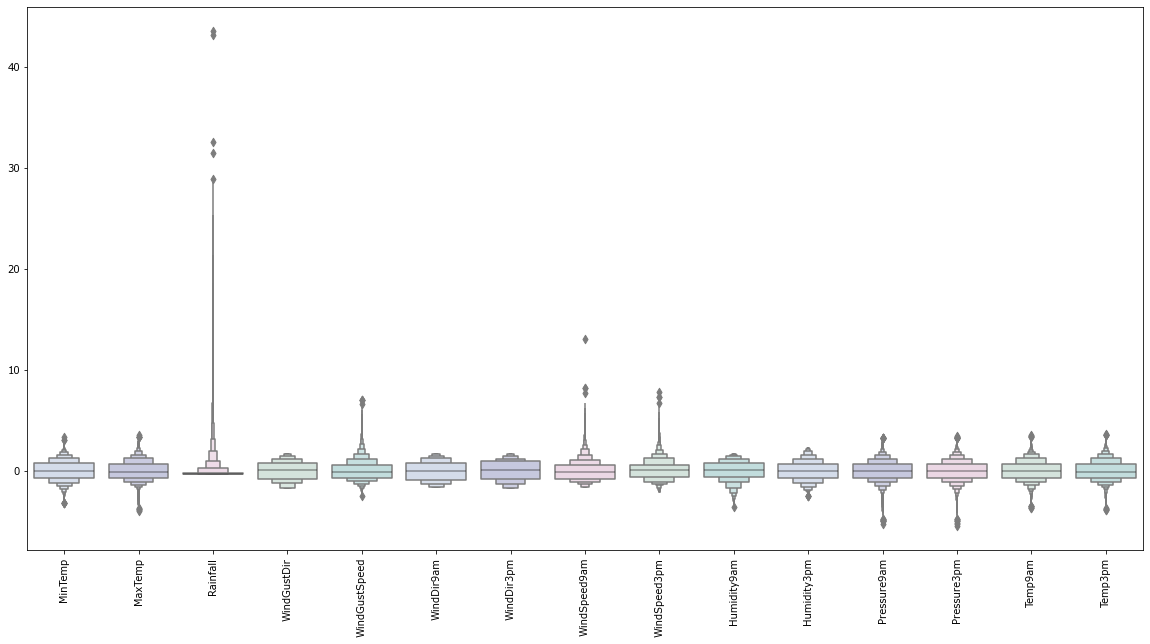

In [16]:
#Detecting outliers
#looking at the scaled features
import matplotlib.pyplot as plt
import seaborn as sns
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

# Removing Outliers and filling the missing values

In [43]:
numerical_features = [column_name for column_name in data.columns if data[column_name].dtype == 'float64']

Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
data

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0      2008-12-01   Albury     13.4     22.9       0.6           W   
1      2008-12-02   Albury      7.4     25.1       0.0         WNW   
2      2008-12-03   Albury     12.9     25.7       0.0         WSW   
3      2008-12-04   Albury      9.2     28.0       0.0          NE   
4      2008-12-05   Albury     17.5     32.3       1.0           W   
...           ...      ...      ...      ...       ...         ...   
145455 2017-06-21    Uluru      2.8     23.4       0.0           E   
145456 2017-06-22    Uluru      3.6     25.3       0.0         NNW   
145457 2017-06-23    Uluru      5.4     26.9       0.0           N   
145458 2017-06-24    Uluru      7.8     27.0       0.0          SE   
145459 2017-06-25    Uluru     14.9      NaN       0.0         NaN   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0                44.0          W        WNW          20.0          24.0   
1                44.0        NNW        WSW           4.0          22.0   
2                46.0          W        WSW          19.0          26.0   
3                24.0         SE          E          11.0           9.0   
4                41.0        ENE         NW           7.0          20.0   
...               ...        ...        ...           ...           ...   
145455           31.0         SE        ENE          13.0          11.0   
145456           22.0         SE          N          13.0           9.0   
145457           37.0         SE        WNW           9.0           9.0   
145458           28.0        SSE          N          13.0           7.0   
145459            NaN        ESE        ESE          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0              71.0         22.0       1007.7       1007.1     16.9     21.8   
1              44.0         25.0       1010.6       1007.8     17.2     24.3   
2              38.0         30.0       1007.6       1008.7     21.0     23.2   
3              45.0         16.0       1017.6       1012.8     18.1     26.5   
4              82.0         33.0       1010.8       1006.0     17.8     29.7   
...             ...          ...          ...          ...      ...      ...   
145455         51.0         24.0       1024.6       1020.3     10.1     22.4   
145456         56.0         21.0       1023.5       1019.1     10.9     24.5   
145457         53.0         24.0       1021.0       1016.8     12.5     26.1   
145458         51.0         24.0       1019.4       1016.5     15.1     26.0   
145459         62.0         36.0       1020.2       1017.9     15.0     20.9   

       RainToday RainTomorrow  Month  
0             No           No     12  
1             No           No     12  
2             No           No     12  
3             No           No     12  
4             No           No     12  
...          ...          ...    ...  
145455        No           No      6  
145456        No           No      6  
145457        No           No      6  
145458        No           No      6  
145459        No          NaN      6  

[113557 rows x 20 columns]

### Analysing boxplot after removing outliers

Text(0, 0.5, 'Temp3pm')

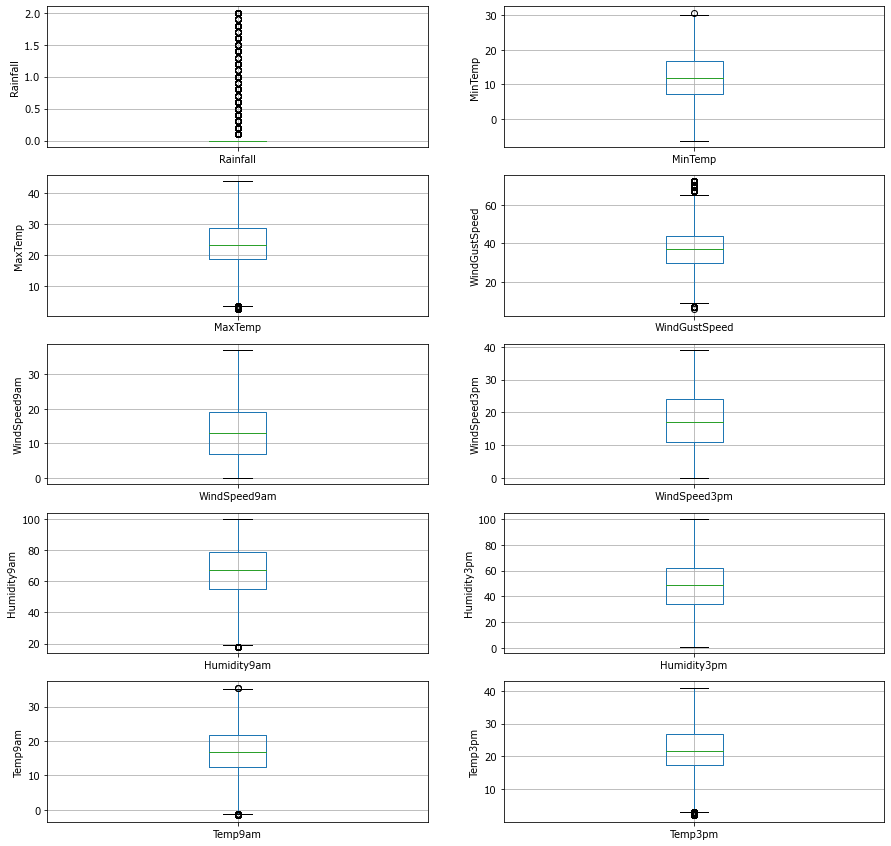

In [19]:
plt.figure(figsize=(15,15))

plt.subplot(5, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(5, 2, 2)
fig = data.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')

plt.subplot(5, 2, 3)
fig = data.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

plt.subplot(5, 2, 4)
fig = data.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(5, 2, 5)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(5, 2, 6)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(5, 2, 7)
fig = data.boxplot(column='Humidity9am')
fig.set_title('')
fig.set_ylabel('Humidity9am')

plt.subplot(5, 2, 8)
fig = data.boxplot(column='Humidity3pm')
fig.set_title('')
fig.set_ylabel('Humidity3pm')

plt.subplot(5, 2, 9)
fig = data.boxplot(column='Temp9am')
fig.set_title('')
fig.set_ylabel('Temp9am')

plt.subplot(5, 2, 10)
fig = data.boxplot(column='Temp3pm')
fig.set_title('')
fig.set_ylabel('Temp3pm')


In [20]:
# Prepairing attributes of scale data
features = data.drop(['RainTomorrow','Month','Date','Location','RainToday'], axis=1) # dropping target and extra columns
target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

count          mean       std       min       25%       50%  \
MinTemp        112241.0 -9.247104e-16  1.000004 -2.844724 -0.721755 -0.019302   
MaxTemp        112451.0 -2.213514e-15  1.000004 -3.109821 -0.756872 -0.065693   
Rainfall       110520.0  1.982742e-14  1.000005 -0.395239 -0.395239 -0.395239   
WindGustDir    105574.0 -2.116605e-15  1.000005 -1.626724 -0.737251 -0.070145   
WindGustSpeed  105613.0  6.005893e-16  1.000005 -2.804033 -0.685280 -0.067310   
WindDir9am     104551.0  1.179662e-14  1.000005 -1.518361 -0.870338 -0.006308   
WindDir3pm     110192.0  6.061119e-16  1.000005 -1.641810 -0.756274 -0.092122   
WindSpeed9am   112056.0 -9.382055e-15  1.000004 -1.632245 -0.755696 -0.004368   
WindSpeed3pm   111100.0  5.629279e-15  1.000005 -2.253978 -0.858120 -0.096744   
Humidity9am    111442.0  3.289831e-15  1.000004 -2.741970 -0.669493  0.002661   
Humidity3pm    109994.0 -2.519573e-15  1.000005 -2.460977 -0.755904  0.019129   
Pressure9am    101657.0  1.649699e-14  1.000005 -3.050212 -0.703125 -0.028146   
Pressure3pm    101697.0  1.297361e-14  1.000005 -3.050957 -0.709549 -0.020900   
Temp9am        112114.0 -4.385779e-15  1.000004 -2.931794 -0.718605 -0.027964   
Temp3pm        110683.0  1.991757e-16  1.000005 -3.062638 -0.746366 -0.065109   

                    75%       max  
MinTemp        0.729981  2.931000  
MaxTemp        0.713721  2.919611  
Rainfall      -0.395239  4.711477  
WindGustDir    0.819328  1.708802  
WindGustSpeed  0.550659  3.022538  
WindDir9am     0.857723  1.721753  
WindDir3pm     0.793414  1.678950  
WindSpeed9am   0.746960  3.000943  
WindSpeed3pm   0.791529  2.694971  
Humidity9am    0.674816  1.851087  
Humidity3pm    0.690824  2.654242  
Pressure9am    0.677514  2.763814  
Pressure3pm    0.683052  2.825517  
Temp9am        0.709766  2.891563  
Temp3pm        0.691842  2.841585

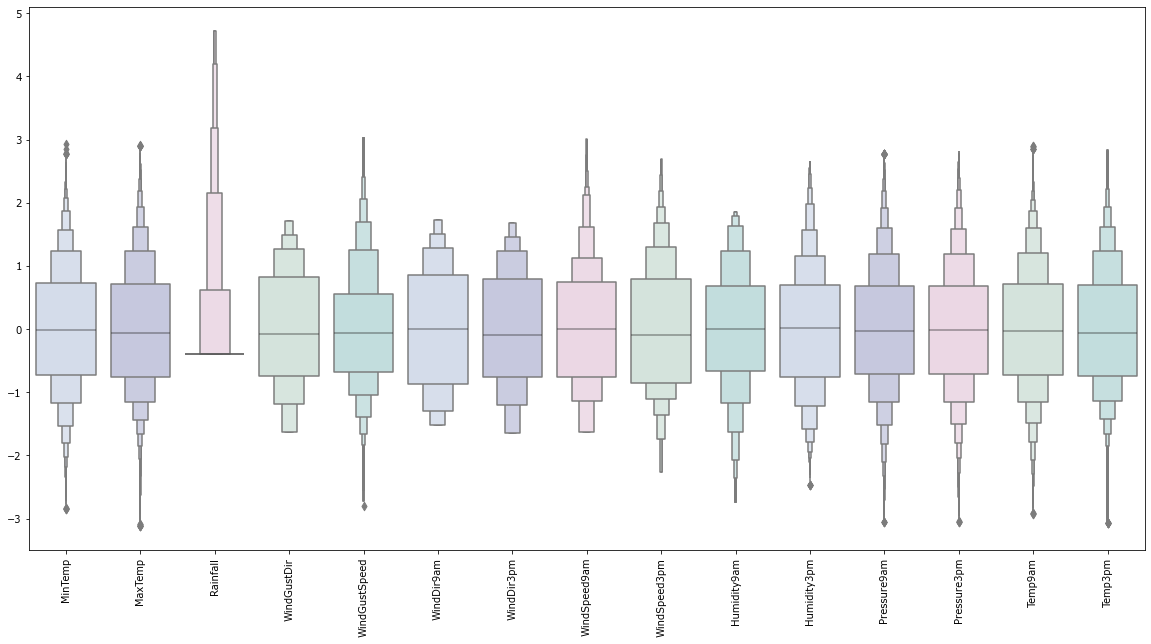

In [21]:
#Detecting outliers
#looking at the scaled features
import matplotlib.pyplot as plt
import seaborn as sns
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

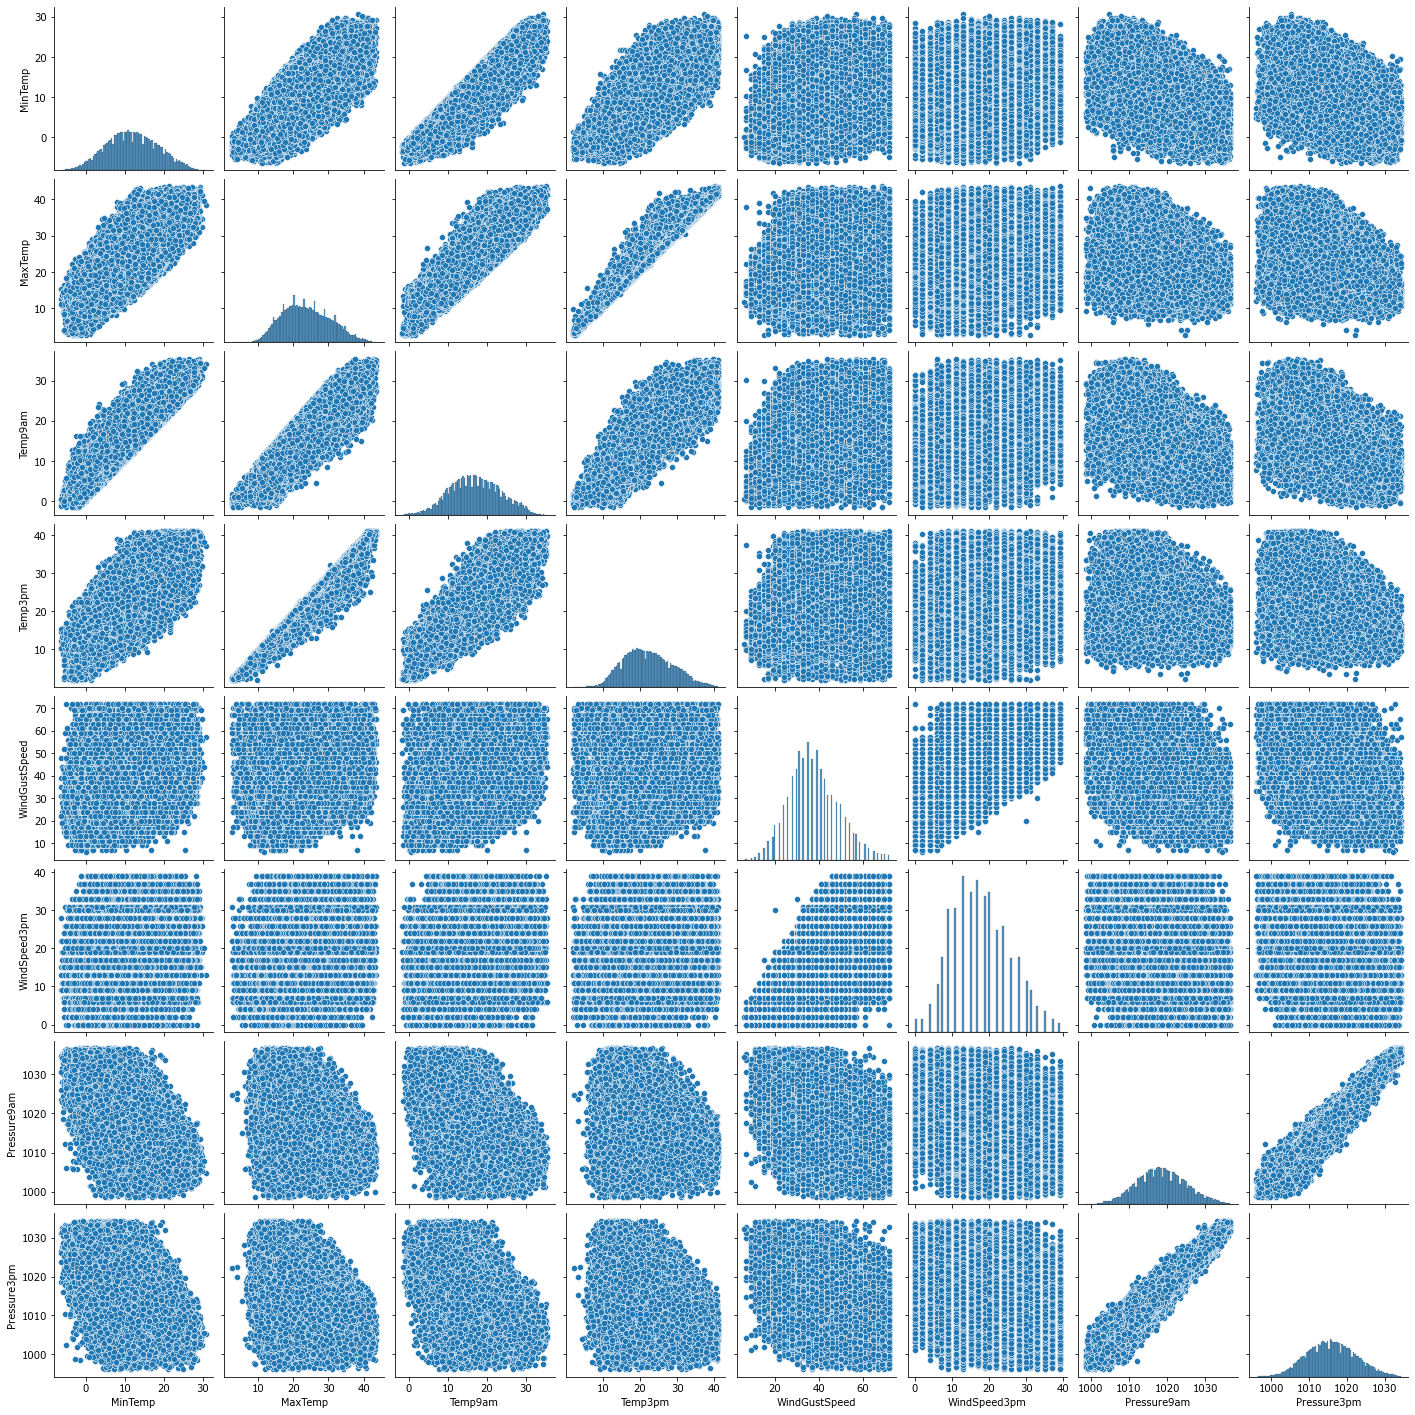

In [22]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
sns.pairplot(data[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

<li>Now a function to compute the seasonal numerical values is defined.
  <ul>
     <li> Input args : 1) Dataframe minimised to location 2) Column name to be converted
     <li> Output args : Mean values of column values according to season
  </ul>

<b>Procedure</b>
<li>Separate the dataframe into seasons (spring, summer, fall, winter dataframes)
<li>compute the mean value of whatever column we're working on.
<br><br>
<b>Note</b> : Since our dataframe has missing WindGustSpeed and Pressure values even on location level, we must decide for default values on these features. If the computed mean value is NaN, then we use these default values.

In [45]:
def compute_missing_seasonal_num_values(dataframe, column_name):
    
    # This function takes input of dataframe minimised according to location wise and 
    # column whose mean values need to be calculated according to season wise
    
    # Default values is for location that doesnt have mean values for column passed
    defaults = {'WindGustSpeed': 5.4, 'Pressure9am': 1013.00, 'Pressure3pm': 1013.00}
    
    # Procedure:
    # 1) Creatin new dataframe according to month defined above
    # 2) Calculating mean of the values of column name passed in input argument
    # 3) If mean is NaN value, then replace it with default values defined
    # 4) return all mean values for all four season
    
    #print()
    #print(column_name)
    #print()
    
    # 1) For Spring Months i.e. 9-12
    spring = dataframe[(dataframe['Month']) >= 9 & (dataframe['Month'] < 12)]
    sp_mean = np.mean(spring.loc[:,column_name])
    if (math.isnan(sp_mean) == True) | (np.isnan(sp_mean) == True):
        sp_mean = defaults[column_name]
    #print("Spring Mean : ",sp_mean)
    
    # 2) For Summer Months i.e. 1-3
    summer = dataframe[((dataframe['Month'] >= 1) | (dataframe['Month'] < 3)) & (dataframe['Month'] == 12)]
    sm_mean = np.mean(summer.loc[:,column_name])
    if (math.isnan(sm_mean) == True) | (np.isnan(sm_mean) == True):
        sm_mean = defaults[column_name]
    #print("Summer Mean : ",sm_mean)
    
    # 3) For Fall Months i.e. 3-6
    fall = dataframe[(dataframe['Month'] >= 3) & (dataframe['Month'] < 6)]
    fa_mean = np.mean(fall.loc[:,column_name])
    if (math.isnan(fa_mean) == True) | (np.isnan(fa_mean) == True):
        fa_mean = defaults[column_name]
    #print("Fall Mean : ",fa_mean)
    
    # 4) For Winter Months i.e. 6-9
    winter = dataframe[(dataframe['Month'] >= 6) & (dataframe['Month'] < 9)]
    wt_mean = np.mean(winter.loc[:,column_name])
    if (math.isnan(wt_mean) == True) | (np.isnan(wt_mean) == True):
        wt_mean = defaults[column_name]
    #print("Winter Mean : ",wt_mean)
    
    return sp_mean, sm_mean, fa_mean, wt_mean

In [46]:
def fill_missing_seasonal_num_values(dataframe, location, column_name):
    dfs = []
    
    # Procedure
    # 1) Separate dataframe according to the location passed i.e. df
    # 2) call function compute_missing_seasonal_num_values(df,column_name)
    # 3) Replace all Nan value with seasonal mean values returned from function above
    #print()
    #print(location)
    #print()
    
    sp, sm, fa, wt = compute_missing_seasonal_num_values(dataframe[dataframe['Location'] == location], column_name)
    df = dataframe[dataframe['Location'] == location]
    
    # separating dataframe according to month-seasonal wise and filling the Nan Values with returned values from function
    sp_df = df[(df['Month'] >= 9) & (df['Month'] < 12)]
    sp_df[column_name].fillna(sp, inplace=True)
    
    sm_df = df[((df['Month'] >= 1) & (df['Month'] < 3)) | (df['Month'] == 12)]
    sm_df[column_name].fillna(sm, inplace=True)
    
    fa_df = df[(df['Month'] >= 3) & (df['Month'] < 6)]
    fa_df[column_name].fillna(fa, inplace=True)
    
    wt_df = df[(df['Month'] >= 6) & (df['Month'] < 9)]
    wt_df[column_name].fillna(wt, inplace=True)

    dfs.append(sp_df)
    dfs.append(sm_df)
    dfs.append(fa_df)
    dfs.append(wt_df)

    df = pd.concat(dfs)
        
    return df

In [47]:
cols = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Humidity9am', 'Humidity3pm',
        'Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
df = data.copy()

# For each column mentioned in above list
    # For unique location wise dataframe

# for example

# 1)
# column = MinTemp 
# location = albury,Sydney,Melbourne,...

# 2)
# column = MaxTemp 
# location = albury,Sydney,Melbourne,...
    
    
for col in cols:
    dfs=[]
    for location in locations:
        dfs.append(fill_missing_seasonal_num_values(df.copy(), location, col))
        #print(dfs)
    # Update the dataframe and pass the copy for next column
    df = pd.concat(dfs)
    #print(df)
df.head()

C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
275 2009-09-02   Albury      1.0     16.8       0.0         ESE   
276 2009-09-03   Albury      6.1     20.7       0.0          NE   
277 2009-09-04   Albury      6.3     16.9       1.4          NW   
278 2009-09-05   Albury      2.1     15.0       0.0         WNW   
279 2009-09-06   Albury      1.6     16.6       0.0          NE   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
275           24.0        ESE          E           9.0           9.0   
276           43.0         SE         NE           4.0          24.0   
277           35.0        ESE        WNW           6.0          13.0   
278           30.0        ESE         NW           4.0          11.0   
279           37.0         SE         NE           9.0          20.0   

     Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
275         82.0         45.0       1024.9       1020.2      7.0     16.0   
276         80.0         54.0       1016.6       1010.8     10.2     20.3   
277         85.0         58.0       1014.4       1012.3     12.5     15.5   
278         81.0         54.0       1019.5       1017.9      8.6     14.9   
279         79.0         47.0       1018.4       1011.4      8.3     15.4   

    RainToday RainTomorrow  Month  
275        No           No      9  
276        No          Yes      9  
277       Yes           No      9  
278        No           No      9  
279        No           No      9

In [48]:
df

Date Location  MinTemp    MaxTemp  Rainfall WindGustDir  \
275    2009-09-02   Albury      1.0  16.800000       0.0         ESE   
276    2009-09-03   Albury      6.1  20.700000       0.0          NE   
277    2009-09-04   Albury      6.3  16.900000       1.4          NW   
278    2009-09-05   Albury      2.1  15.000000       0.0         WNW   
279    2009-09-06   Albury      1.6  16.600000       0.0          NE   
...           ...      ...      ...        ...       ...         ...   
145455 2017-06-21    Uluru      2.8  23.400000       0.0           E   
145456 2017-06-22    Uluru      3.6  25.300000       0.0         NNW   
145457 2017-06-23    Uluru      5.4  26.900000       0.0           N   
145458 2017-06-24    Uluru      7.8  27.000000       0.0          SE   
145459 2017-06-25    Uluru     14.9  21.698404       0.0         NaN   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
275         24.000000        ESE          E           9.0           9.0   
276         43.000000         SE         NE           4.0          24.0   
277         35.000000        ESE        WNW           6.0          13.0   
278         30.000000        ESE         NW           4.0          11.0   
279         37.000000         SE         NE           9.0          20.0   
...               ...        ...        ...           ...           ...   
145455      31.000000         SE        ENE          13.0          11.0   
145456      22.000000         SE          N          13.0           9.0   
145457      37.000000         SE        WNW           9.0           9.0   
145458      28.000000        SSE          N          13.0           7.0   
145459      36.407202        ESE        ESE          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
275            82.0         45.0       1024.9       1020.2      7.0     16.0   
276            80.0         54.0       1016.6       1010.8     10.2     20.3   
277            85.0         58.0       1014.4       1012.3     12.5     15.5   
278            81.0         54.0       1019.5       1017.9      8.6     14.9   
279            79.0         47.0       1018.4       1011.4      8.3     15.4   
...             ...          ...          ...          ...      ...      ...   
145455         51.0         24.0       1024.6       1020.3     10.1     22.4   
145456         56.0         21.0       1023.5       1019.1     10.9     24.5   
145457         53.0         24.0       1021.0       1016.8     12.5     26.1   
145458         51.0         24.0       1019.4       1016.5     15.1     26.0   
145459         62.0         36.0       1020.2       1017.9     15.0     20.9   

       RainToday RainTomorrow  Month  
275           No           No      9  
276           No          Yes      9  
277          Yes           No      9  
278           No           No      9  
279           No           No      9  
...          ...          ...    ...  
145455        No           No      6  
145456        No           No      6  
145457        No           No      6  
145458        No           No      6  
145459        No          NaN      6  

[113557 rows x 20 columns]

In [49]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall         3037
WindGustDir      7983
WindGustSpeed       0
WindDir9am       9006
WindDir3pm       3365
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday        3037
RainTomorrow     2739
Month               0
dtype: int64

In [50]:
data = df
data.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall         3037
WindGustDir      7983
WindGustSpeed       0
WindDir9am       9006
WindDir3pm       3365
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday        3037
RainTomorrow     2739
Month               0
dtype: int64

#### Filling Rainfall values with value=0

In [51]:
data['Rainfall'].fillna(0, inplace=True)
data.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      7983
WindGustSpeed       0
WindDir9am       9006
WindDir3pm       3365
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday        3037
RainTomorrow     2739
Month               0
dtype: int64

#### Dropping rows where RainToday values are NaN

In [52]:
data = data.dropna(subset=['RainToday' , 'RainTomorrow'])  #remove NaN records 

In [53]:
data.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      6985
WindGustSpeed       0
WindDir9am       8171
WindDir3pm       2851
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
Month               0
dtype: int64

### For Remaning Categorical data, We will use mode of the data to fill NaN values in place of mean

In [54]:
def compute_missing_seasonal_cat_values(dataframe, column_name):
    #separate to seasons
    
    #print()
    #print(column_name)
    #print()
    
    spring = dataframe[(dataframe['Month']) >= 9 & (dataframe['Month'] < 12)]
    sp_mode = spring[column_name].describe().top
    if (type(sp_mode) == float):
        sp_mode = dataframe[column_name].describe().top
    #print("Spring_mode : ",sp_mode)
    
    summer = dataframe[((dataframe['Month'] >= 1) | (dataframe['Month'] < 3)) & (dataframe['Month'] == 12)]
    sm_mode = summer[column_name].describe().top
    if (type(sm_mode) == float):
        sm_mode = dataframe[column_name].describe().top
    #print("Summer_mode : ",sm_mode)
    
    fall = dataframe[(dataframe['Month'] >= 3) & (dataframe['Month'] < 6)]
    fa_mode = fall[column_name].describe().top
    if (type(fa_mode) == float):
        fa_mode = dataframe[column_name].describe().top
    #print("Fall_mode : ",fa_mode)
        
    winter = dataframe[(dataframe['Month'] >= 6) & (dataframe['Month'] < 9)]
    wt_mode = winter[column_name].describe().top
    if (type(wt_mode) == float):
        wt_mode = dataframe[column_name].describe().top
    #print("Winter_mode : ",wt_mode)
    
    return sp_mode, sm_mode, fa_mode, wt_mode

In [55]:
def fill_missing_seasonal_cat_values(dataframe, location, column_name):
    dfs = []
    
    #print()
    #print(location)
    #print()
    
    sp, sm, fa, wt = compute_missing_seasonal_cat_values(dataframe[dataframe['Location'] == location], column_name)
    df = dataframe[dataframe['Location'] == location]

    sp_df = df[(df['Month'] >= 9) & (df['Month'] < 12)]
    sp_df[column_name].fillna(sp, inplace=True)
    
    sm_df = df[((df['Month'] >= 1) & (df['Month'] < 3)) | (df['Month'] == 12)]
    sm_df[column_name].fillna(sm, inplace=True)
    
    fa_df = df[(df['Month'] >= 3) & (df['Month'] < 6)]
    fa_df[column_name].fillna(fa, inplace=True)
    
    wt_df = df[(df['Month'] >= 6) & (df['Month'] < 9)]
    wt_df[column_name].fillna(wt, inplace=True)

    dfs.append(sp_df)
    dfs.append(sm_df)
    dfs.append(fa_df)
    dfs.append(wt_df)

    df = pd.concat(dfs)
        
    return df

In [56]:
cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
df = data.copy()
for col in cols:
    dfs=[]
    for location in locations:
        dfs.append(fill_missing_seasonal_cat_values(df.copy(), location, col))
    # Update the dataframe and pass the copy for next column
    df = pd.concat(dfs)
    #print(df)
df.head()

C:\Users\HP\anaconda3\envs\Inhouse\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
275 2009-09-02   Albury      1.0     16.8       0.0         ESE   
276 2009-09-03   Albury      6.1     20.7       0.0          NE   
277 2009-09-04   Albury      6.3     16.9       1.4          NW   
278 2009-09-05   Albury      2.1     15.0       0.0         WNW   
279 2009-09-06   Albury      1.6     16.6       0.0          NE   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
275           24.0        ESE          E           9.0           9.0   
276           43.0         SE         NE           4.0          24.0   
277           35.0        ESE        WNW           6.0          13.0   
278           30.0        ESE         NW           4.0          11.0   
279           37.0         SE         NE           9.0          20.0   

     Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
275         82.0         45.0       1024.9       1020.2      7.0     16.0   
276         80.0         54.0       1016.6       1010.8     10.2     20.3   
277         85.0         58.0       1014.4       1012.3     12.5     15.5   
278         81.0         54.0       1019.5       1017.9      8.6     14.9   
279         79.0         47.0       1018.4       1011.4      8.3     15.4   

    RainToday RainTomorrow  Month  
275        No           No      9  
276        No          Yes      9  
277       Yes           No      9  
278        No           No      9  
279        No           No      9

In [57]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      4462
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
Month               0
dtype: int64

In [58]:
top = df['WindGustDir'].describe().top
df['WindGustDir'].fillna(top, inplace=True)
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

In [59]:
data = df

In [60]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

In [61]:
data.to_csv('Datasets/cleaned_weatherAUS.csv',index=False)